<a href="https://colab.research.google.com/github/zahra-sharifzadeh/pytorch/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import torch 
from torch import nn # nn contains all of PyTorch's building blocks for neural network.
import matplotlib.pyplot as plt
import numpy as np
torch.__version__

'1.13.1+cu116'

### 041-Creating a Simple Dataset Using the Linear Regression Formula

In [53]:
# creat known parameters
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

print(X[:10]) 
print(y[:10])

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


In [54]:
len(X), len(y)

(50, 50)

### 042-Splitting Our Data Into Training and Test Sets

In [55]:
#create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### 043-Building a function to Visualize Our Data

In [56]:
def plot_prediction(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))

  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  #plot testing data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  #plot the predictions is available in red

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Prediction")

  # show the legend
  plt.legend(prop={"size": 14})



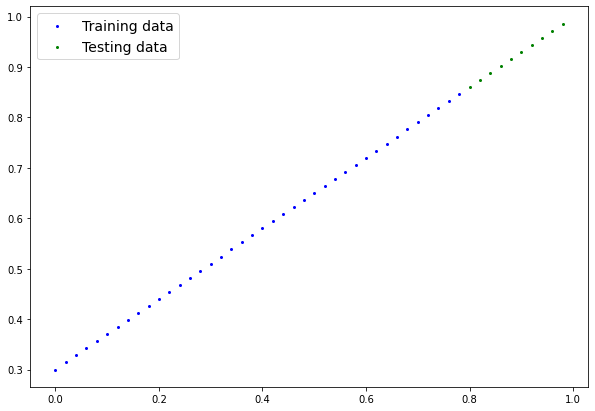

In [57]:
plot_prediction()

### 044-Creating Our First PyTorch Model for Linear Regression

In [58]:
# Create linear regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, 
                                           dtype=torch.float), 
                                           requires_grad=True)
                                           
    self.bias = nn.Parameter(torch.randn(1,
                                        dtype=torch.float),
                                        requires_grad=True)
                                        
    
    # Forward method to define the computationin the model

  def forward(self, x: torch.Tensor) -> torch.Tensor:
      return self.weights * x + self.bias # linear regression formula



### 047-Checking Out the Internals of Our PyTorch Model

In [59]:
# Creat a random seed
torch.manual_seed(42)

# Creat an instance of the model
model_0 = LinearRegressionModel()

# Check out paramaters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [60]:
# List name of parameters
print(model_0.state_dict())
print(f"ideal value of W={weight} and the ideal val of bias is {bias}. ")


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])
ideal value of W=0.7 and the ideal val of bias is 0.3. 


### 048-Making Predictions With Our Random Model Using Inference Mode

In [61]:
# Make prediction with model
with torch.inference_mode(): # like torch.no_grad() But much much Better
  y_preds = model_0(X_test)

y_preds

# with torch.no_grad():
#   y_preds = model_0(X_test)

# y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

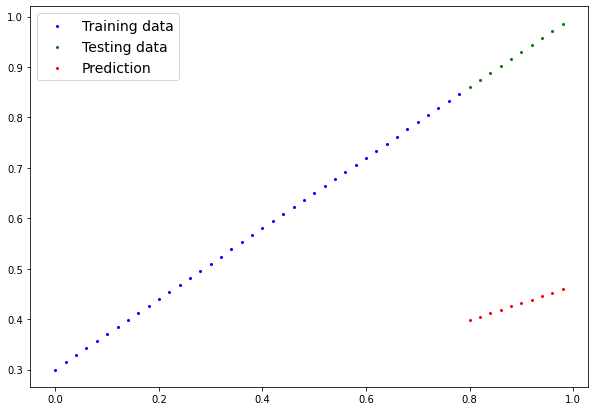

In [62]:
plot_prediction(predictions=y_preds)

### 050-Setting Up an Optimizer and a Loss Function

In [63]:
# Loss func
loss_fn = nn.L1Loss()

# Optimizer

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [64]:

torch.manual_seed(42) # Repudicibility

# Track important values
epoch_count = []
train_loss_values = []
test_loss_values = []

epochs = 200
### Training
# loop through the data:
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all requrie gradient = True

  # Forward path
  y_pred = model_0(X_train)

  # Calculate Loss function
  loss = loss_fn(y_pred, y_train)

  #print(f"loss: {loss}")

  # Optimizer zero grad
  optimizer.zero_grad() # Start fresh

  # Preform backprpagation on the Loss with respect to parameters
  loss.backward()

  # Optimizer
  optimizer.step()

# Testing 
  model_0.eval() # turns off settings of training

  with torch.inference_mode():
    # Doing forward path
    test_pred = model_0(X_test)

    # Calculating The loss
    test_loss = loss_fn(test_pred, y_test)

    # Print result of training 
    if epoch % 10 ==0:
      print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

      epoch_count.append(epoch)
      train_loss_values.append(loss)
      test_loss_values.append(test_loss)

      # print parameters vals
      print(model_0.state_dict())

      # print ideal vals 
      print(weight, bias)

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
0.7 0.3
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
0.7 0.3
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
0.7 0.3
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
0.7 0.3
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
0.7 0.3
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
0.7 0.3
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weig

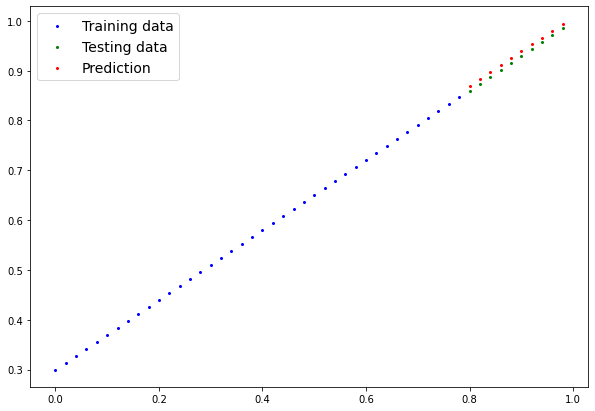

In [65]:
# Predictions after 100 epochs
with torch.inference_mode():
  y_preds_new = model_0(X_test)

plot_prediction(predictions= y_preds_new)

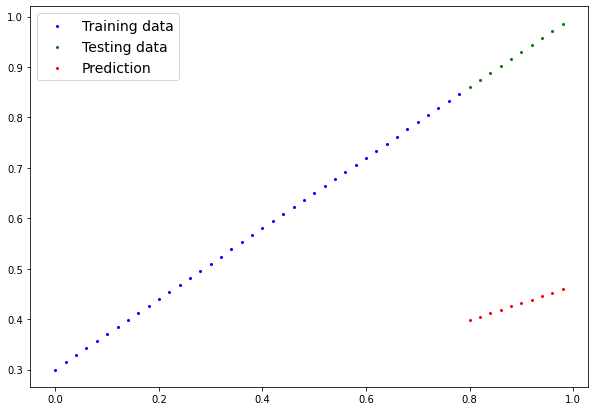

In [66]:
# Prediciton at first step
plot_prediction(predictions=y_preds)

Text(0.5, 1.0, 'Training and test loss curve')

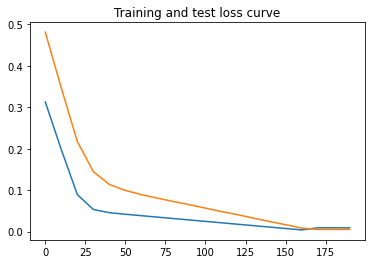

In [69]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(train_loss_values).cpu().numpy()), label="Train loss")
plt.plot(epoch_count,np.array(torch.tensor(test_loss_values).cpu().numpy()), label="Test loss")
plt.title("Training and test loss curve")

In [72]:
optimizer.state_dict()

{'state': {0: {'momentum_buffer': None}, 1: {'momentum_buffer': None}},
 'param_groups': [{'lr': 0.01,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'foreach': None,
   'differentiable': False,
   'params': [0, 1]}]}

### Saving Model in PyTorch

In [70]:
model_0

LinearRegressionModel()

In [71]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [75]:
# Saving our Pytorch model
from pathlib import Path

# Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Creat model save Path
MODEL_NAME = "01_PyTorch_workflow_model_0.pth" # OR .pt
MODEL_SAVE_PATH = MODEL_PATH/ MODEL_NAME

#print(MODEL_SAVE_PATH)

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_PyTorch_workflow_model_0.pth


In [76]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1207 Mar 27 20:34 01_PyTorch_workflow_model_0.pth


### Load model Back

In [78]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [81]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

print(loaded_model_0.state_dict())

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

print(loaded_model_0.state_dict())


OrderedDict([('weights', tensor([-1.1229])), ('bias', tensor([-0.1863]))])
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])


In [82]:
# MAke some prediction wi th loaded model

loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_0_preds = loaded_model_0(X_test)

loaded_model_0_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

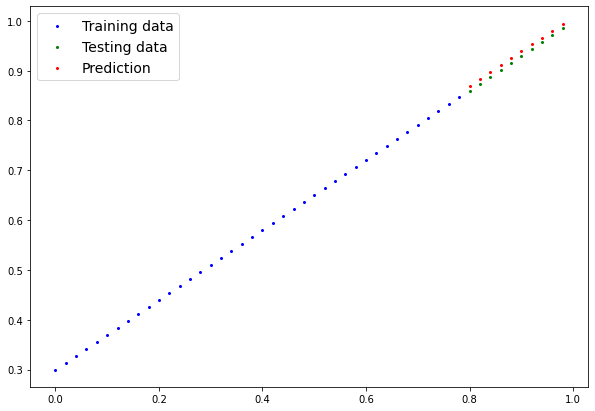

In [83]:
plot_prediction(predictions=loaded_model_0_preds)

In [84]:
# Compare two model

y_preds_new == loaded_model_0_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])